# Naive Bayes Classifier
### Methodology
    Before training our model, the dataset must be preprocessed. Data preprocessing is done to eliminate the incomplete, noisy and inconsistent data.  This stage wil help in maximizing classifier performance.
   
1. All the characters will be represented in lowercase so the word which may be written in different cases will be treated as the same word. For example, ‘prize’ and ‘PRIZE’ must be treated as one word. 
2. Tokenizing each message in the dataset by chopping it into pieces and removing the punctuation characters. 
3. Then the next step is stemming inflected words into their base or root form by removing the commoner morphological and inflectional endings from words, so the related words will be mapped to the same stem. 
4. The next stage will be removing the stop words. Stop words are frequently occurring words that hardly carry any information and orientation.

### Algorithm

    The main classification principle for this algorithm is based on searching through the text for words that are either more likely to occur in spam messages, or in ham messages.
A Naïve Bayes classifier is based on the application of the Bayes’ theorem. Bayes’ law gives the probability of the occurrence of an event given some conditions or other events. The adjective naive comes from the assumption that the features in a dataset are mutually independent.
$$
P(\omega_1|spam) = \frac{N_{\omega_{i|spam}}+\alpha}{N_{spam}+\alpha{N_{dictionary}}}
$$

In [1]:
from random import sample
from numpy import *
import string
import pandas as pd
with open ("SMSSpamCollection.txt","r") as file:
    sms = [line.rstrip('\n')for line in file] #Save a list of strings and strip at new lines.
#  convert to lower case
# 's+' eliminate duplicate whitespace
# '\w' non-characters words
# .strip() remove spaces at the begining and end of a string.
# Remove Punctuation

label=[]
punctuations = """"!()-[]{};:'"\,<â>./?@#$%^&*_~"""
no_punct=''
for word in sms:
    label.append(word.split()[0])
for text in range(len(sms)):
    sms[text] = sms[text].lower().replace('\W+',' ').replace('\t',' ').replace("ham",' ').replace("spam",' ').replace('\s+', ' ').strip().split()
#    print(sms[word])
    for words in range(len(sms[text])):
        j = 0
        for char in sms[text][words]:
            if char in punctuations:
                sms[text][words] = sms[text][words].replace(char,'')

#### Load the SMS collection

#### Tokenization - SMS collection becomes a list of lists, each containing words of each message.
1. Create Mapping List to be used as label column in the dataframe. (ham/spam)
2. Create tokens and remove spacings.
3. Remove punctuations and unwanted characters.

In [2]:
dataset=pd.DataFrame()
dataset.flags.allows_duplicate_labels = False

#### Create Panda Data Frame and create a table of 2 columns: Label & SMS

In [3]:
datasets = column_stack((label,sms))
dataset = column_stack((label,sms))

dataset=pd.DataFrame(dataset)
columns=['Decision','SMS']
dataset.columns=columns
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\shape_base.py:652: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(v)


,Decision,SMS
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, dont, think, he, goes, to, usf, he, l..."


#### Shuffle 75% of the data from the SMS Collection and create two data frames. Also, keep the same distribution.

1. Train_data
2. Test_data

In [4]:
# dataset.sample(frac) :Return a random sample of items from an axis of object.
# Drop specified labels from rows or columns.
train_data = dataset.sample(frac=0.75,random_state=1).reset_index(drop=True) # Takes 75% of the data
test_data = dataset.drop(train_data.index).reset_index(drop=True) # Test with the remaining 25% of the data

In [5]:
print("Orgininal dataset:\n",dataset['Decision'].value_counts()/dataset['Decision'].shape*100)
print("Trained dataset:\n",train_data['Decision'].value_counts()/train_data['Decision'].shape*100)
print("Test dataset:\n",test_data['Decision'].value_counts()/test_data['Decision'].shape*100)

Orgininal dataset:
 ham     86.598493
spam    13.401507
Name: Decision, dtype: float64
Trained dataset:
 ham     86.722488
spam    13.277512
Name: Decision, dtype: float64
Test dataset:
 ham     86.944046
spam    13.055954
Name: Decision, dtype: float64


#### Create our dictionary of words from the SMS collection

In [6]:
train_data.head()

,Decision,SMS
0,ham,"[looks, like, u, wil, b, getting, a, headstart..."
1,ham,"[i, noe, la, u, wana, pei, bf, oso, rite, k, l..."
2,ham,"[2mro, i, am, not, coming, to, gym, machan, go..."
3,spam,"[todays, vodafone, numbers, ending, with, 4882..."
4,ham,"[hi, hope, ur, day, , good, back, from, walk, ..."


In [7]:
train_data['SMS'][4]

['hi',
 'hope',
 'ur',
 'day',
 '',
 'good',
 'back',
 'from',
 'walk',
 'table',
 'booked',
 'for',
 'half',
 'eight',
 'let',
 'me',
 'know',
 'when',
 'ur',
 'coming',
 'over']

In [8]:
# Append the list of strings from begining to end using the train_data
vocabulary = list(set(train_data['SMS'].sum()))
print("10 Random words in the local dictionary:\n")
for i in range (0,10):
    print("{}.\t{}\n.\n.".format(280*i+1,vocabulary[280*i+1]))

10 Random words in the local dictionary:

1.	cuppa
.
.
281.	nowsavamobmember
.
.
561.	wifehow
.
.
841.	petrolrs
.
.
1121.	ful
.
.
1401.	jus
.
.
1681.	wrking
.
.
1961.	respect
.
.
2241.	refilled
.
.
2521.	modl
.
.


#### Count the number of seperate words in each message

In [9]:
# For each row[1], which is the list of all words in the vocabulary, count the number of 
# appearance every time the message words is found. Do it for every message.
word_counts_per_sms = pd.DataFrame([
    [row[1].count(word) for word in vocabulary]
    for _, row in train_data.iterrows()], columns=vocabulary)


In [10]:
x = train_data
y = train_data
z = train_data
j = train_data
x.head()

,Decision,SMS
0,ham,"[looks, like, u, wil, b, getting, a, headstart..."
1,ham,"[i, noe, la, u, wana, pei, bf, oso, rite, k, l..."
2,ham,"[2mro, i, am, not, coming, to, gym, machan, go..."
3,spam,"[todays, vodafone, numbers, ending, with, 4882..."
4,ham,"[hi, hope, ur, day, , good, back, from, walk, ..."


In [40]:
train_data.shape

(4180, 8234)

In [37]:
train_data = pd.concat([train_data, word_counts_per_sms], axis=1).iloc[:,0:]

In [38]:
train_data.head()

,Decision,SMS,,cuppa,st,08709222922,callcost,update,askin,vldo,...,09094100151,misstake,cumin,babeprobpop,nutter,neo69,chiong,numbers,likingbe,peteynoi’m
0,ham,"[looks, like, u, wil, b, getting, a, headstart...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[i, noe, la, u, wana, pei, bf, oso, rite, k, l...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[2mro, i, am, not, coming, to, gym, machan, go...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,spam,"[todays, vodafone, numbers, ending, with, 4882...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,ham,"[hi, hope, ur, day, , good, back, from, walk, ...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###### Install WordCLoud and Seaborn if not already installed.
!pip install seaborn $$$$
!pip install WordCloud

#### Label Distribution
#### Show ham/spam percentage using Seabord

Text(0.5, 1.0, 'Label Distribution')

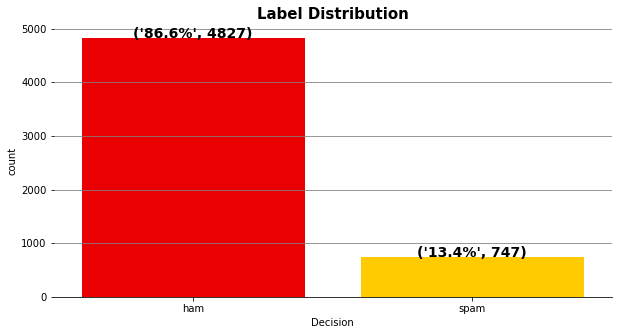

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=14)
#setting the background and foreground color
fig=plt.figure(figsize=(10,5))
ax=plt.axes()
ax.set_facecolor("white")
fig.patch.set_color("white")

#Dealing with spines
for i in ['left','top','right']:
    ax.spines[i].set_visible(False)
    
ax.grid(linestyle="-",axis='y',color='gray')

#countplot
a=sns.countplot(data=dataset,x='Decision',saturation=3,palette='hot')

without_hue(dataset,'Decision',a)

plt.title("Label Distribution",weight='bold',fontsize=15)

#### Most used words using WordCloud

In [42]:
from wordcloud import WordCloud
spam_words=""
ham_words=""
for element in datasets:
    if element[0] == 'spam':
        spam_words += ' '.join(element[1])
    elif element[0] =='ham':
        ham_words += ' '.join(element[1])

## Most used SPAM words 

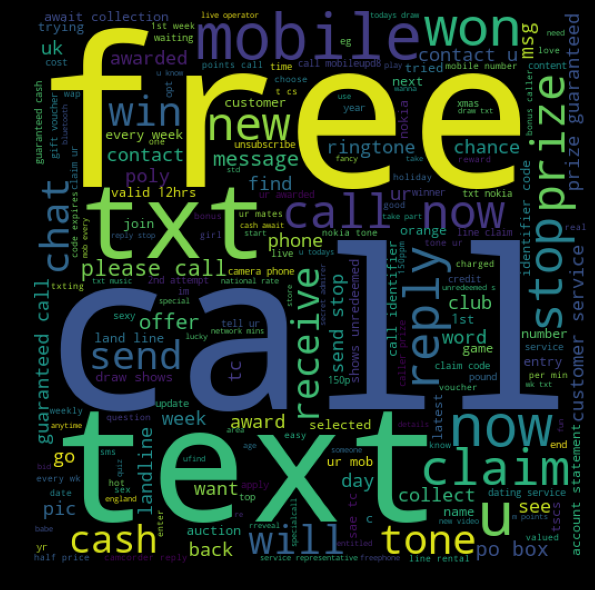

In [43]:
spam_wc = WordCloud(width = 500,height = 500).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('on')
plt.tight_layout(pad = 0)
plt.show()

## Most used HAM words 

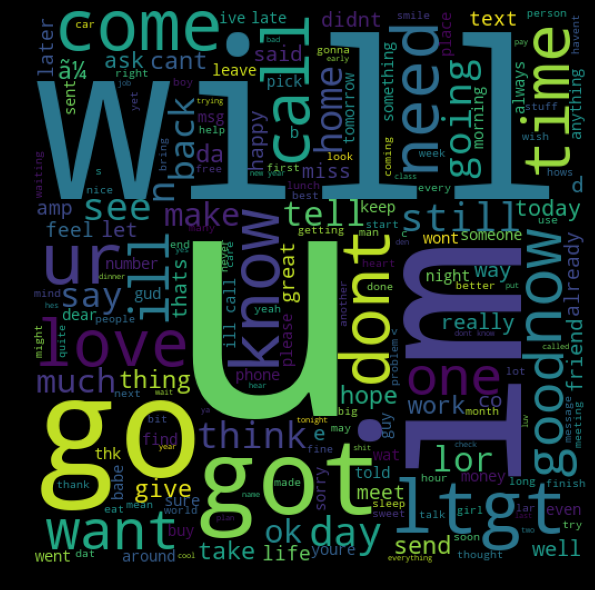

In [44]:
spam_wc = WordCloud(width = 500,height = 500).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('on')
plt.tight_layout(pad = 0)
plt.show()

In [45]:
train_data.head()

,Decision,SMS,,cuppa,st,08709222922,callcost,update,askin,vldo,...,09094100151,misstake,cumin,babeprobpop,nutter,neo69,chiong,numbers,likingbe,peteynoi’m
0,ham,"[looks, like, u, wil, b, getting, a, headstart...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[i, noe, la, u, wana, pei, bf, oso, rite, k, l...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[2mro, i, am, not, coming, to, gym, machan, go...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,spam,"[todays, vodafone, numbers, ending, with, 4882...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,ham,"[hi, hope, ur, day, , good, back, from, walk, ...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Compute the following:
    
    Nvoc: Total unique words in the dataset
    Nspam: Total number of words in the spam messages
    Nham: Total number of words in the ham messages
    Pspam: Probability to get a spam message in the dataset
    Pham: Probability to get a ham message in the dataset

In [46]:
Pspam = 100*train_data['Decision'].value_counts()['spam'] / train_data.shape[0]
Pham = 100*train_data['Decision'].value_counts()['ham'] / train_data.shape[0]
Nspam = train_data.loc[train_data['Decision'] == 'spam', 'SMS'].apply(len).sum()
Nham = train_data.loc[train_data['Decision'] == 'ham','SMS'].apply(len).sum()
Nvoc = len(vocabulary)
print("Pspam: {}%\nPham: {}%\nNspam: {}\nNham: {}\nNvoc: {}".format(Pspam,Pham,Nspam,Nham,Nvoc))

Pspam: 13.277511961722489%
Pham: 86.72248803827752%
Nspam: 13188
Nham: 52123
Nvoc: 8232


### Concatenate the train data data frame with the vocabulary and the appearance of each word

Define the Naive Bayes Classifier formula

##### For Spam messages: $$
P(\omega_1|spam) = \frac{N_{\omega_{i|spam}}+\alpha}{N_{spam}+\alpha{N_{dictionary}}}
$$
$$
$$
$$
$$
##### For Ham messages:
$$
P(\omega_1|ham) = \frac{N_{\omega_{i|ham}}+\alpha}{N_{ham}+\alpha{N_{dictionary}}}
$$

In [47]:
alpha=1
train_data = train_data.reset_index(drop=True) # Takes 75% of the data
def p_w_spam(word):
    if word in train_data.columns:
        return (train_data.loc[train_data['Decision'] == 'spam', word].sum() + alpha) / (Nspam + alpha*Nvoc)
    else:
        return 1
      
def p_w_ham(word):
    if word in train_data.columns:
        return (train_data.loc[train_data['Decision'] == 'ham', word].sum() + alpha) / (Nham + alpha*Nvoc)
    else:
        return 1

#### The classification fucntion that takes the into account Pspam and Pham
#### In general, for every word in the message, we have the following:


$$
{P(spam|\omega_1,\omega_2,\omega_3,...\omega_n)} = {P(spam)}\frac{\prod_{i=1}^{n}P(\omega_i|spam)}{\prod_{i=1}^{n}P(\omega_i)}
$$

In [48]:
def classify(message):
    p_spam_given_message = Pspam
    p_ham_given_message = Pham
    for word in message:
        p_spam_given_message *= p_w_spam(word)
        p_ham_given_message *= p_w_ham(word)
    if p_ham_given_message > p_spam_given_message:
        return 'ham'
    elif p_ham_given_message < p_spam_given_message:
        return 'spam'
    else:
        return 'needs human classification'

In [50]:
ham,spam,no_result =0,0,0


### Classify using the same initial dataset and compare real results to the naive bayes results

In [51]:
print(train_data.columns)

Index(['Decision', 'SMS', '', 'cuppa', 'st', '08709222922', 'callcost',
       'update', 'askin', 'vldo',
       ...
       '09094100151', 'misstake', 'cumin', 'babeprobpop', 'nutter', 'neo69',
       'chiong', 'numbers', 'likingbe', 'peteynoi’m'],
      dtype='object', length=8234)


In [52]:
classify("100 buy cash prize this link rpgt tgtm tgtmigbt rggimrmgt rgrmig5r ")

'ham'

In [58]:
train_data.head()

,Decision,SMS,,cuppa,st,08709222922,callcost,update,askin,vldo,...,09094100151,misstake,cumin,babeprobpop,nutter,neo69,chiong,numbers,likingbe,peteynoi’m
0,ham,"[looks, like, u, wil, b, getting, a, headstart...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[i, noe, la, u, wana, pei, bf, oso, rite, k, l...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[2mro, i, am, not, coming, to, gym, machan, go...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,spam,"[todays, vodafone, numbers, ending, with, 4882...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,ham,"[hi, hope, ur, day, , good, back, from, walk, ...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
for messages in test_data['SMS']:
    ret = classify(messages)
    print("Message: {} \t Label: {}\n".format(messages,ret))
    if(ret=='ham'):
        ham +=1
    elif (ret=='spam'):
        spam +=1
        
    else:    
        no_result +=1


Message: ['can', 'ã¼', 'send', 'me', 'a', 'copy', 'of', 'da', 'report'] 	 Label: ham

Message: ['swhrt', 'how', 'u', 'deyhope', 'ur', 'ok', 'tot', 'about', 'u', '2daylove', 'n', 'misstake', 'care'] 	 Label: ham

Message: ['ok', 'da', 'i', 'already', 'planned', 'i', 'wil', 'pick', 'you'] 	 Label: ham

Message: ['urgent', 'please', 'call', '0906346330', 'your', 'abta', 'complimentary', '4', 'spanish', 'holiday', 'or', '£10000', 'cash', 'await', 'collection', 'sae', 'tcs', 'box', '47', 'po19', '2ez', '150ppm', '18+'] 	 Label: spam

Message: ['sorry', 'ill', 'call', 'later', 'in', 'meeting'] 	 Label: ham

Message: ['i', 'just', 'really', 'need', 'shit', 'before', 'tomorrow', 'and', 'i', 'know', 'you', 'wont', 'be', 'awake', 'before', 'like', '6'] 	 Label: ham

Message: ['im', 'good', 'have', 'you', 'registered', 'to', 'vote'] 	 Label: ham

Message: ['hmm', 'ok', 'ill', 'stay', 'for', 'like', 'an', 'hour', 'cos', 'my', 'eye', 'is', 'really', 'sore'] 	 Label: ham

Message: ['dear', 'got', 'b

Message: ['the', 'lay', 'man', 'just', 'to', 'let', 'you', 'know', 'you', 'are', 'missed', 'and', 'thought', 'off', 'do', 'have', 'a', 'great', 'day', 'and', 'if', 'you', 'can', 'send', 'me', 'bimbo', 'and', 'ugos', 'numbers', 'ill', 'appreciate', 'safe'] 	 Label: ham

Message: ['detroit', 'the', 'home', 'of', 'snow', 'enjoy', 'it'] 	 Label: ham

Message: ['show', 'ur', 'colours', 'euro', '2004', '241', 'offer', 'get', 'an', 'england', 'flag', '', '3lions', 'tone', 'on', 'ur', 'phone', 'click', 'on', 'the', 'following', 'service', 'message', 'for', 'info'] 	 Label: spam

Message: ['okie'] 	 Label: ham

Message: ['aight', 'im', 'chillin', 'in', 'a', 'friends', 'room', 'so', 'text', 'me', 'when', 'youre', 'on', 'the', 'way'] 	 Label: ham

Message: ['is', 'toshiba', 'portege', 'm100', 'gd'] 	 Label: ham

Message: ['well', 'welp', 'is', 'sort', 'of', 'a', 'semiobscure', 'internet', 'thing'] 	 Label: ham

Message: ['text', 'pass', 'to', '69669', 'to', 'collect', 'your', 'polyphonic', 'ringt

Message: ['are', 'there', 'ta', 'jobs', 'available', 'let', 'me', 'know', 'please', 'cos', 'i', 'really', 'need', 'to', 'start', 'working'] 	 Label: ham

Message: ['aiyar', 'hard', '2', 'type', 'u', 'later', 'free', 'then', 'tell', 'me', 'then', 'i', 'call', 'n', 'scold', 'n', 'tell', 'u'] 	 Label: ham

Message: ['yup', 'im', 'free'] 	 Label: ham

Message: ['good', 'good', 'billy', 'mates', 'all', 'gone', 'just', 'been', 'jogging', 'again', 'did', 'enjoy', 'concert'] 	 Label: ham

Message: ['yo', 'come', 'over', 'carlos', 'will', 'be', 'here', 'soon'] 	 Label: ham

Message: ['awww', 'dat', 'is', 'sweet', 'we', 'can', 'think', 'of', 'something', 'to', 'do', 'he', 'he', 'have', 'a', 'nice', 'time', 'tonight', 'ill', 'probably', 'txt', 'u', 'later', 'cos', 'im', 'lonely', '', 'xxx'] 	 Label: ham

Message: ['i', 'guess', 'it', 'is', 'useless', 'calling', 'u', '4', 'something', 'important'] 	 Label: ham

Message: ['ha', 'ha', '', 'had', 'popped', 'down', 'to', 'the', 'loo', 'when', 'you', '

Message: ['evry', 'emotion', 'dsnt', 'hav', 'wordsevry', 'wish', 'dsnt', 'hav', 'prayrs', 'if', 'u', 'smiled', 'world', 'is', 'wit', 'uothrwise', 'even', 'd', 'drop', 'of', 'tear', 'dsnt', 'lik', '2', 'stay', 'wit', 'uso', 'b', 'happy', 'good', 'morning', 'keep', 'smiling'] 	 Label: ham

Message: ['so', 'what', 'about', 'you', 'what', 'do', 'you', 'remember'] 	 Label: ham

Message: ['ujhhhhhhh', 'computer', 'shipped', 'out', 'with', 'address', 'to', 'sandiago', 'and', 'parantella', 'lane', 'wtf', 'poop'] 	 Label: ham

Message: ['mm', 'yes', 'dear', 'look', 'how', 'i', 'am', 'hugging', 'you', 'both', 'p'] 	 Label: ham

Message: ['i', 'like', 'dis', 'sweater', 'fr', 'mango', 'but', 'no', 'more', 'my', 'size', 'already', 'so', 'irritating'] 	 Label: ham

Message: ['1', 'i', 'dont', 'have', 'her', 'number', 'and', '2', 'its', 'gonna', 'be', 'a', 'massive', 'pain', 'in', 'the', 'ass', 'and', 'id', 'rather', 'not', 'get', 'involved', 'if', 'thats', 'possible'] 	 Label: ham

Message: ['anytim

Message: ['ok', 'i', 'msg', 'u', 'b4', 'i', 'leave', 'my', 'house'] 	 Label: ham

Message: ['still', 'at', 'west', 'coast', 'haiz', 'ãœll', 'take', 'forever', 'to', 'come', 'back'] 	 Label: ham

Message: ['mmm', '', 'fuck', '', 'merry', 'christmas', 'to', 'me'] 	 Label: ham

Message: ['alright', 'thanks', 'for', 'the', 'advice', 'enjoy', 'your', 'night', 'out', 'ima', 'try', 'to', 'get', 'some', 'sleep'] 	 Label: ham

Message: ['update', 'your', 'face', 'book', 'status', 'frequently', ''] 	 Label: ham

Message: ['just', 'now', 'saw', 'your', 'messageit', 'k', 'da'] 	 Label: ham

Message: ['was', 'it', 'something', 'u', 'ate'] 	 Label: ham

Message: ['so', 'what', 'did', 'the', 'bank', 'say', 'about', 'the', 'money'] 	 Label: ham

Message: ['aiyar', 'dun', 'disturb', 'u', 'liao', 'thk', 'u', 'have', 'lots', '2', 'do', 'aft', 'ur', 'cupboard', 'come'] 	 Label: ham

Message: ['hey', 'they', 'r', 'not', 'watching', 'movie', 'tonight', 'so', 'ill', 'prob', 'b', 'home', 'early'] 	 Label: ham

Message: ['my', 'computer', 'just', 'fried', 'the', 'only', 'essential', 'part', 'we', 'dont', 'keep', 'spares', 'of', 'because', 'my', 'fucking', 'idiot', 'roommates', 'looovvve', 'leaving', 'the', 'thing', 'running', 'on', 'full', 'ltgt', '7'] 	 Label: ham

Message: ['my', 'friend', 'shes', 'studying', 'at', 'warwick', 'weve', 'planned', 'to', 'go', 'shopping', 'and', 'to', 'concert', 'tmw', 'but', 'it', 'may', 'be', 'canceled', 'havnt', 'seen', 'for', 'ages', 'yeah', 'we', 'should', 'get', 'together', 'sometime'] 	 Label: ham

Message: ['probably', 'a', 'couple', 'hours', 'tops'] 	 Label: ham

Message: ['lol', '', 'grins', '', 'im', 'not', 'babe', 'but', 'thanks', 'for', 'thinking', 'of', 'me'] 	 Label: ham

Message: ['man', 'this', 'bus', 'is', 'so', 'so', 'so', 'slow', 'i', 'think', 'youre', 'gonna', 'get', 'there', 'before', 'me'] 	 Label: ham

Message: ['hope', 'this', 'text', 'meets', 'you', 'smiling', 'if', 'not', 'then', 'let', 'this', 'text', 'give', 'you', 'a', 'reason', 't

Message: ['symptoms', 'when', 'u', 'are', 'in', 'love', '1u', 'like', 'listening', 'songs', '2u', 'get', 'stopped', 'where', 'u', 'see', 'the', 'name', 'of', 'your', 'beloved', '3u', 'wont', 'get', 'angry', 'when', 'your'] 	 Label: ham

Message: ['sun', 'ah', 'thk', 'mayb', 'can', 'if', 'dun', 'have', 'anythin', 'on', 'thk', 'have', 'to', 'book', 'e', 'lesson', 'e', 'pilates', 'is', 'at', 'orchard', 'mrt', 'u', 'noe', 'hor'] 	 Label: ham

Message: ['try', 'to', 'do', 'something', 'dear', 'you', 'read', 'something', 'for', 'exams'] 	 Label: ham

Message: ['7', 'wonders', 'in', 'my', 'world', '7th', 'you', '6th', 'ur', 'style', '5th', 'ur', 'smile', '4th', 'ur', 'personality', '3rd', 'ur', 'nature', '2nd', 'ur', 'sms', 'and', '1st', 'ur', 'lovely', 'friendship', 'good', 'morning', 'dear'] 	 Label: ham

Message: ['gettin', 'rdy', 'to', 'ship', 'comp'] 	 Label: spam

Message: ['i', 'am', 'in', 'hospital', 'da', '', 'i', 'will', 'return', 'home', 'in', 'evening'] 	 Label: ham

Message: ['pi

Message: ['freemsg', 'txt', 'call', 'to', 'no', '86888', '', 'claim', 'your', 'reward', 'of', '3', 'hours', 'talk', 'time', 'to', 'use', 'from', 'your', 'phone', 'now', 'subscribe6gbpmnth', 'inc', '3hrs', '16', 'stoptxtstop'] 	 Label: spam

Message: ['hey', 'j', 'r', 'u', 'feeling', 'any', 'better', 'hopeso', 'hunny', 'i', 'amnow', 'feelin', 'ill', '', 'ithink', 'i', 'may', 'have', 'tonsolitusaswell', 'damn', 'iam', 'layin', 'in', 'bedreal', 'bored', 'lotsof', 'luv', 'me', 'xxxx'] 	 Label: ham

Message: ['and', 'i', 'dont', 'plan', 'on', 'staying', 'the', 'night', 'but', 'i', 'prolly', 'wont', 'be', 'back', 'til', 'late'] 	 Label: ham

Message: ['thanx', '4', 'puttin', 'da', 'fone', 'down', 'on', 'me'] 	 Label: ham

Message: ['i', 'need', 'an', '8th', 'but', 'im', 'off', 'campus', 'atm', 'could', 'i', 'pick', 'up', 'in', 'an', 'hour', 'or', 'two'] 	 Label: ham

Message: ['oh', 'haha', 'den', 'we', 'shld', 'had', 'went', 'today', 'too', 'gee', 'nvm', 'la', 'kaiez', 'i', 'dun', 'mind', '

Message: ['sry', 'dajst', 'nw', 'only', 'i', 'came', 'to', 'home'] 	 Label: ham

Message: ['thats', 'cool', 'hell', 'be', 'here', 'all', 'night', 'lemme', 'know', 'when', 'youre', 'around'] 	 Label: ham

Message: ['are', 'you', 'staying', 'in', 'town', ''] 	 Label: ham

Message: ['haha', 'yeah', '2', 'oz', 'is', 'kind', 'of', 'a', 'shitload'] 	 Label: ham

Message: ['ok', 'u', 'can', 'take', 'me', 'shopping', 'when', 'u', 'get', 'paid', '=d'] 	 Label: ham

Message: ['my', 'life', 'means', 'a', 'lot', 'to', 'me', 'not', 'because', 'i', 'love', 'my', 'life', 'but', 'because', 'i', 'love', 'the', 'people', 'in', 'my', 'life', 'the', 'world', 'calls', 'them', 'friends', 'i', 'call', 'them', 'my', 'world', 'ge'] 	 Label: ham

Message: ['alright', 'well', 'bring', 'it', 'to', 'you', 'see', 'you', 'in', 'like', 'ltgt', 'mins'] 	 Label: ham

Message: ['but', 'pls', 'dont', 'play', 'in', 'others', 'life'] 	 Label: ham

Message: ['eatin', 'my', 'lunch'] 	 Label: ham

Message: ['hmmmbut', 'you', 

Message: ['your', 'weekly', 'coolmob', 'tones', 'are', 'ready', 'to', 'download', 'this', 'weeks', 'new', 'tones', 'include', '1', 'crazy', 'frogaxel', 'f', '2', 'akonlonely', '3', 'black', 'eyeddont', 'p', 'more', 'info', 'in', 'n'] 	 Label: spam

Message: ['well', 'boy', 'am', 'i', 'glad', 'g', 'wasted', 'all', 'night', 'at', 'applebees', 'for', 'nothing'] 	 Label: ham

Message: ['cashbincouk', 'get', 'lots', 'of', 'cash', 'this', 'weekend', 'wwwcashbincouk', 'dear', 'welcome', 'to', 'the', 'weekend', 'we', 'have', 'got', 'our', 'biggest', 'and', 'best', 'ever', 'cash', 'give', 'away', 'these'] 	 Label: spam

Message: ['ok', 'lor', 'or', 'u', 'wan', 'me', 'go', 'look', '4', 'u'] 	 Label: ham

Message: ['u', 'wan', '2', 'haf', 'lunch', 'im', 'in', 'da', 'canteen', 'now'] 	 Label: ham

Message: ['dont', 'make', 'life', 'too', 'stressfull', 'always', 'find', 'time', 'to', 'laugh', 'it', 'may', 'not', 'add', 'years', 'to', 'your', 'life', 'but', 'surely', 'adds', 'more', 'life', 'to', 'u

Message: ['dont', 'worry', 'though', 'i', 'understand', 'how', 'important', 'it', 'is', 'that', 'i', 'be', 'put', 'in', 'my', 'place', 'with', 'a', 'poorly', 'thought', 'out', 'punishment', 'in', 'the', 'face', 'of', 'the', 'worst', 'thing', 'that', 'has', 'ever', 'happened', 'to', 'me', 'brb', 'gonna', 'go', 'kill', 'myself'] 	 Label: ham

Message: ['honey', 'can', 'you', 'pls', 'find', 'out', 'how', 'much', 'they', 'sell', 'predicte', 'in', 'nigeria', 'and', 'how', 'many', 'times', 'can', 'it', 'be', 'used', 'its', 'very', 'important', 'to', 'have', 'a', 'reply', 'before', 'monday'] 	 Label: ham

Message: ['e', 'admin', 'building', 'there', 'i', 'might', 'b', 'slightly', 'earlier', 'ill', 'call', 'u', 'when', 'im', 'reaching'] 	 Label: ham

Message: ['fyi', 'im', 'at', 'usf', 'now', 'swing', 'by', 'the', 'room', 'whenever'] 	 Label: ham

Message: ['i', 'can', 'call', 'in', 'ltgt', 'min', 'if', 'thats', 'ok'] 	 Label: ham

Message: ['ummmmmaah', 'many', 'many', 'happy', 'returns', 'of

Message: ['whenwhere', 'do', 'i', 'pick', 'you', 'up'] 	 Label: ham

Message: ['as', 'usual', 'u', 'can', 'call', 'me', 'ard', '10', 'smth'] 	 Label: ham

Message: ['new', 'theory', 'argument', 'wins', 'd', 'situation', 'but', 'loses', 'the', 'person', 'so', 'dont', 'argue', 'with', 'ur', 'friends', 'just', '', '', '', 'kick', 'them', 'amp', 'say', 'im', 'always', 'correct'] 	 Label: ham

Message: ['for', 'many', 'things', 'its', 'an', 'antibiotic', 'and', 'it', 'can', 'be', 'used', 'for', 'chest', 'abdomen', 'and', 'gynae', 'infections', 'even', 'bone', 'infections'] 	 Label: ham

Message: ['poor', 'girl', 'cant', 'go', 'one', 'day', 'lmao'] 	 Label: ham

Message: ['or', 'just', 'do', 'that', '6times'] 	 Label: ham

Message: ['todays', 'vodafone', 'numbers', 'ending', 'with', '4882', 'are', 'selected', 'to', 'a', 'receive', 'a', '£350', 'award', 'if', 'your', 'number', 'matches', 'call', '09064019014', 'to', 'receive', 'your', '£350', 'award'] 	 Label: spam

Message: ['you', 'have', '

Message: ['good', 'morning', 'my', 'boytoy', 'hows', 'those', 'yummy', 'lips', '', 'wheres', 'my', 'sexy', 'buns', 'now', '', 'what', 'do', 'you', 'do', '', 'do', 'you', 'think', 'of', 'me', '', 'do', 'you', 'crave', 'me', '', 'do', 'you', 'need', 'me', ''] 	 Label: ham

Message: ['match', 'startedindia', 'ltgt', 'for', '2'] 	 Label: ham

Message: ['once', 'free', 'call', 'me', 'sir'] 	 Label: ham

Message: ['hey', 'do', 'you', 'want', 'anything', 'to', 'buy'] 	 Label: ham

Message: ['hey', 'babe', 'hows', 'it', 'going', '', 'did', 'you', 'ever', 'figure', 'out', 'where', 'your', 'going', 'for', 'new', 'years', ''] 	 Label: ham

Message: ['kkcongratulation', ''] 	 Label: ham

Message: ['g', 'wants', 'to', 'know', 'where', 'the', 'fuck', 'you', 'are'] 	 Label: ham

Message: ['no', 'it', 'was', 'cancelled', 'yeah', 'baby', 'well', 'that', 'sounds', 'important', 'so', 'i', 'understand', 'my', 'darlin', 'give', 'me', 'a', 'ring', 'later', 'on', 'this', 'fone', 'love', 'kate', 'x'] 	 Label:

Message: ['happy', 'new', 'year', 'hope', 'you', 'are', 'having', 'a', 'good', 'semester'] 	 Label: ham

Message: ['esplanade', 'lor', 'where', 'else'] 	 Label: ham

Message: ['can', 'you', 'talk', 'with', 'me'] 	 Label: ham

Message: ['hmph', 'go', 'head', 'big', 'baller'] 	 Label: ham

Message: ['well', 'its', 'not', 'like', 'you', 'actually', 'called', 'someone', 'a', 'punto', 'that', 'woulda', 'been', 'worse'] 	 Label: ham

Message: ['nope', 'since', 'ayo', 'travelled', 'he', 'has', 'forgotten', 'his', 'guy'] 	 Label: ham

Message: ['you', 'still', 'around', 'looking', 'to', 'pick', 'up', 'later'] 	 Label: ham

Message: ['cds', '4u', 'congratulations', 'ur', 'awarded', '£500', 'of', 'cd', 'gift', 'vouchers', 'or', '£125', 'gift', 'guaranteed', '', 'freeentry', '2', '£100', 'wkly', 'draw', 'xt', 'music', 'to', '87066', 'tncs', 'wwwldewcom1win150ppmx3age16'] 	 Label: spam

Message: ['theres', 'someone', 'here', 'that', 'has', 'a', 'year', 'ltgt', 'toyota', 'camry', 'like', 'mr', 'ola

Message: ['i', 'think', 'i', 'am', 'disturbing', 'her', 'da'] 	 Label: ham

Message: ['sorry', 'ill', 'call', 'you', 'later', 'i', 'am', 'in', 'meeting', 'sir'] 	 Label: ham

Message: ['havent', 'stuck', 'at', 'orchard', 'in', 'my', 'dads', 'car', 'going', '4', 'dinner', 'now', 'u', 'leh', 'so', 'r', 'they', 'free', 'tonight'] 	 Label: ham

Message: ['ok', 'i', 'also', 'wan', '2', 'watch', 'e', '9', 'pm', 'show'] 	 Label: ham

Message: ['i', 'dunno', 'lei', 'like', 'dun', 'haf'] 	 Label: ham

Message: ['but', 'your', 'brother', 'transfered', 'only', 'ltgt', '+', 'ltgt', '', 'pa'] 	 Label: ham

Message: ['i', 'calls', 'you', 'later', 'afternoon', 'onwords', 'mtnl', 'service', 'get', 'problem', 'in', 'south', 'mumbai', 'i', 'can', 'hear', 'you', 'but', 'you', 'cannt', 'listen', 'me'] 	 Label: ham

Message: ['83039', '62735=£450', 'uk', 'break', 'accommodationvouchers', 'terms', '', 'conditions', 'apply', '2', 'claim', 'you', 'mustprovide', 'your', 'claim', 'number', 'which', 'is', '15541

Message: ['hi', 'chikku', 'send', 'some', 'nice', 'msgs'] 	 Label: ham

Message: ['he', 'is', 'impossible', 'to', 'argue', 'with', 'and', 'he', 'always', 'treats', 'me', 'like', 'his', 'sub', 'like', 'he', 'never', 'released', 'me', '', 'which', 'he', 'did', 'and', 'i', 'will', 'remind', 'him', 'of', 'that', 'if', 'necessary'] 	 Label: ham

Message: ['after', 'my', 'work', 'ah', 'den', '6', 'plus', 'lor', 'u', 'workin', 'oso', 'rite', 'den', 'go', 'orchard', 'lor', 'no', 'other', 'place', 'to', 'go', 'liao'] 	 Label: ham

Message: ['to', 'the', 'wonderful', 'okors', 'have', 'a', 'great', 'month', 'we', 'cherish', 'you', 'guys', 'and', 'wish', 'you', 'well', 'each', 'day', 'mojibiola'] 	 Label: ham

Message: ['cuz', 'ibored', 'and', 'don', 'wanna', 'study'] 	 Label: ham

Message: ['wot', 'about', 'on', 'wed', 'nite', 'i', 'am', '3', 'then', 'but', 'only', 'til', '9'] 	 Label: ham

Message: ['rose', 'for', 'redred', 'for', 'bloodblood', 'for', 'heartheart', 'for', 'u', 'but', 'u', 'for',

Message: ['babe', 'i', 'fucking', 'love', 'you', 'too', '', 'you', 'know', 'fuck', 'it', 'was', 'so', 'good', 'to', 'hear', 'your', 'voice', 'i', 'so', 'need', 'that', 'i', 'crave', 'it', 'i', 'cant', 'get', 'enough', 'i', 'adore', 'you', 'ahmad', 'kisses'] 	 Label: ham

Message: ['k', 'sure', 'am', 'in', 'my', 'relatives', 'home', 'sms', 'me', 'de', 'pls'] 	 Label: ham

Message: ['i', 'sent', 'them', 'do', 'you', 'like'] 	 Label: ham

Message: ['fuuuuck', 'i', 'need', 'to', 'stop', 'sleepin', 'sup'] 	 Label: ham

Message: ['im', 'in', 'town', 'now', 'so', 'ill', 'jus', 'take', 'mrt', 'down', 'later'] 	 Label: ham

Message: ['i', 'just', 'cooked', 'a', 'rather', 'nice', 'salmon', 'a', 'la', 'you'] 	 Label: ham

Message: ['i', 'uploaded', 'mine', 'to', 'facebook'] 	 Label: ham

Message: ['what', 'time', 'u', 'wrkin'] 	 Label: ham

Message: ['okie'] 	 Label: ham

Message: ['ree', 'entry', 'in', '2', 'a', 'weekly', 'comp', 'for', 'a', 'chance', 'to', 'win', 'an', 'ipod', 'txt', 'pod', 'to

Message: ['yeah', 'work', 'is', 'fine', 'started', 'last', 'week', 'all', 'the', 'same', 'stuff', 'as', 'before', 'dull', 'but', 'easy', 'and', 'guys', 'are', 'fun'] 	 Label: ham

Message: ['you', 'do', 'your', 'studies', 'alone', 'without', 'anyones', 'help', 'if', 'you', 'cant', 'no', 'need', 'to', 'study'] 	 Label: ham

Message: ['please', 'tell', 'me', 'not', 'all', 'of', 'my', 'car', 'keys', 'are', 'in', 'your', 'purse'] 	 Label: ham

Message: ['i', 'didnt', 'get', 'anything', 'da'] 	 Label: ham

Message: ['ok', 'sweet', 'dreams'] 	 Label: ham

Message: ['well', 'shes', 'in', 'for', 'a', 'big', 'surprise'] 	 Label: ham

Message: ['as', 'usualiam', 'fine', 'happy', 'amp', 'doing', 'well'] 	 Label: ham

Message: ['1', 'in', 'cbe', '2', 'in', 'chennai'] 	 Label: ham

Message: ['can', 'help', 'u', 'swoop', 'by', 'picking', 'u', 'up', 'from', 'wherever', 'ur', 'other', 'birds', 'r', 'meeting', 'if', 'u', 'want'] 	 Label: ham

Message: ['if', 'anyone', 'calls', 'for', 'a', 'treadmill', 

Message: ['good', 'morning', 'my', 'love', '', 'i', 'go', 'to', 'sleep', 'now', 'and', 'wish', 'you', 'a', 'great', 'day', 'full', 'of', 'feeling', 'better', 'and', 'opportunity', '', 'you', 'are', 'my', 'last', 'thought', 'babe', 'i', 'love', 'you', 'kiss'] 	 Label: ham

Message: ['kothi', 'print', 'out', 'marandratha'] 	 Label: ham

Message: ['but', 'we', 'havent', 'got', 'da', 'topic', 'yet', 'rite'] 	 Label: ham

Message: ['ok', 'no', 'problem', 'yup', 'im', 'going', 'to', 'sch', 'at', '4', 'if', 'i', 'rem', 'correctly'] 	 Label: ham

Message: ['thanks', 'ill', 'keep', 'that', 'in', 'mind'] 	 Label: ham

Message: ['aah', 'bless', 'hows', 'your', 'arm'] 	 Label: ham

Message: ['dear', 'sirsalam', 'alaikkumpride', 'and', 'pleasure', 'meeting', 'you', 'today', 'at', 'the', 'tea', 'shopwe', 'are', 'pleased', 'to', 'send', 'you', 'our', 'contact', 'number', 'at', 'qatarrakhesh', 'an', 'indianpls', 'save', 'our', 'numberrespectful', 'regards'] 	 Label: ham

Message: ['gal', 'n', 'boy', '

Message: ['free', 'entry', 'to', 'the', 'gr8prizes', 'wkly', 'comp', '4', 'a', 'chance', 'to', 'win', 'the', 'latest', 'nokia', '8800', 'psp', 'or', '£250', 'cash', 'every', 'wktxt', 'great', 'to', '80878', 'httpwwwgr8prizescom', '08715705022'] 	 Label: spam

Message: ['somebody', 'set', 'up', 'a', 'website', 'where', 'you', 'can', 'play', 'hold', 'em', 'using', 'eve', 'online', 'spacebucks'] 	 Label: ham

Message: ['its', 'sunny', 'in', 'california', 'the', 'weathers', 'just', 'cool'] 	 Label: ham

Message: ['you', 'have', '1', 'new', 'message', 'call', '02070836089'] 	 Label: spam

Message: ['i', 'can', 'make', 'it', 'up', 'there', 'squeezed', 'ltgt', 'bucks', 'out', 'of', 'my', 'dad'] 	 Label: ham

Message: ['good', 'day', 'to', 'you', 'toopray', 'for', 'meremove', 'the', 'teeth', 'as', 'its', 'painful', 'maintaining', 'other', 'stuff'] 	 Label: ham

Message: ['how', 'are', 'you', 'babes', 'hope', 'your', 'doing', 'ok', 'i', 'had', 'a', 'shit', 'nights', 'sleep', 'i', 'fell', 'aslee

Message: ['wishing', 'you', 'a', 'beautiful', 'day', 'each', 'moment', 'revealing', 'even', 'more', 'things', 'to', 'keep', 'you', 'smiling', 'do', 'enjoy', 'it'] 	 Label: ham

Message: ['for', 'the', 'most', 'sparkling', 'shopping', 'breaks', 'from', '45', 'per', 'person', 'call', '0121', '2025050', 'or', 'visit', 'wwwshortbreaksorguk'] 	 Label: ham

Message: ['arun', 'can', 'u', 'transfr', 'me', 'd', 'amt'] 	 Label: ham

Message: ['sorry', 'ill', 'call', 'later'] 	 Label: ham

Message: ['if', 'you', 'hear', 'a', 'loud', 'scream', 'in', 'about', 'ltgt', 'minutes', 'its', 'cause', 'my', 'gyno', 'will', 'be', 'shoving', 'things', 'up', 'me', 'that', 'dont', 'belong', ''] 	 Label: ham

Message: ['december', 'only', 'had', 'your', 'mobile', '11mths+', 'you', 'are', 'entitled', 'to', 'update', 'to', 'the', 'latest', 'colour', 'camera', 'mobile', 'for', 'free', 'call', 'the', 'mobile', 'update', 'co', 'free', 'on', '08002986906'] 	 Label: spam

Message: ['ok', 'i', 'thk', 'i', 'got', 'it', 

Message: ['you', 'are', 'a', 'great', 'role', 'model', 'you', 'are', 'giving', 'so', 'much', 'and', 'i', 'really', 'wish', 'each', 'day', 'for', 'a', 'miracle', 'but', 'god', 'as', 'a', 'reason', 'for', 'everything', 'and', 'i', 'must', 'say', 'i', 'wish', 'i', 'knew', 'why', 'but', 'i', 'dont', 'ive', 'looked', 'up', 'to', 'you', 'since', 'i', 'was', 'young', 'and', 'i', 'still', 'do', 'have', 'a', 'great', 'day'] 	 Label: ham

Message: ['ya', 'im', 'referin', 'to', 'meis', 'ex', 'wat', 'no', 'ah', 'waitin', '4', 'u', 'to', 'treat', 'somebody', 'shld', 'b', 'rich', 'liaoso', 'gd', 'den', 'u', 'dun', 'have', 'to', 'work', 'frm', 'tmr', 'onwards'] 	 Label: ham

Message: ['miles', 'and', 'smiles', 'r', 'made', 'frm', 'same', 'letters', 'but', 'do', 'u', 'know', 'd', 'difference', 'smile', 'on', 'ur', 'face', 'keeps', 'me', 'happy', 'even', 'though', 'i', 'am', 'miles', 'away', 'from', 'u', 'keep', 'smiling', 'good', 'nyt'] 	 Label: ham

Message: ['by', 'the', 'way', 'ive', 'put', 'a', 's

In [54]:
print("\t\t\t\t\t\tFinal result:\n\t\t\t\t\t\t=============\n\n\t\t\t\t\t  1. Ham:{}%\n\t\t\t\t\t  2. Spam:{}%\n\t\t\t\t\t  3. no_result:{}%".format(ham*100/(ham+spam+no_result),spam*100/(ham+spam+no_result),no_result*100/(ham+spam+no_result)))

						Final result:

					  1. Ham:80.64516129032258%
					  2. Spam:19.35483870967742%
					  3. no_result:0.0%


In [55]:
print("Orgininal dataset:\n",dataset['Decision'].value_counts()/dataset['Decision'].shape*100)
print("Trained dataset:\n",train_data['Decision'].value_counts()/train_data['Decision'].shape*100)
print("Test dataset:\n",test_data['Decision'].value_counts()/test_data['Decision'].shape*100)
print("\n\n\t\t\t\t\tFinal result error: \n\t\t\t\t\t===================\n\n\t\t\t\t\tHam error= {}%\n\t\t\t\t\tSpam error= {}%".format((ham*100/(ham+spam+no_result))/86.598493,(spam*100/(ham+spam+no_result))/13.401507))

Orgininal dataset:
 ham     86.598493
spam    13.401507
Name: Decision, dtype: float64
Trained dataset:
 ham     86.722488
spam    13.277512
Name: Decision, dtype: float64
Test dataset:
 ham     86.944046
spam    13.055954
Name: Decision, dtype: float64


					Final result error: 

					Ham error= 0.9312536338285076%
					Spam error= 1.444228526663264%


# End

In [56]:
for i
classify("YOU WONNNNNNN")

'ham'

In [25]:
import torch

In [44]:
!python --version

Python 3.9.7


In [48]:
import syft
print(torch.__version__)

1.10.0+cpu


In [40]:
!pip --update syft==0.2.9


Usage:   
  pip <command> [options]

no such option: --update


In [1]:
import numpy as np
from sklearn.metrics import roc_auc_score

import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

import warnings

warnings.filterwarnings("ignore")

In [2]:
%run preprocess.py

In [3]:
import preprocess

In [4]:
inputs = np.load('./inputs.npy')
labels = np.load('./labels.npy')
VOCAB_SIZE = int(inputs.max()) + 1

In [5]:
# Training params
EPOCHS = 15
CLIP = 5 # gradient clipping - to avoid gradient explosion (frequent in RNNs)
lr = 0.1
BATCH_SIZE = 32

# Model params
EMBEDDING_DIM = 50
HIDDEN_DIM = 10
DROPOUT = 0.2

In [6]:
import syft as sy
from syft.frameworks.torch.hook import hook

In [7]:
labels = torch.tensor(labels)
inputs = torch.tensor(inputs)

# splitting training and test data
pct_test = 0.2

train_labels = labels[:-int(len(labels)*pct_test)]
train_inputs = inputs[:-int(len(labels)*pct_test)]

test_labels = labels[-int(len(labels)*pct_test):]
test_inputs = inputs[-int(len(labels)*pct_test):]

In [8]:
labels = torch.tensor(labels)
inputs = torch.tensor(inputs)

# splitting training and test data
pct_test = 0.2

train_labels = labels[:-int(len(labels)*pct_test)]
train_inputs = inputs[:-int(len(labels)*pct_test)]

test_labels = labels[-int(len(labels)*pct_test):]
test_inputs = inputs[-int(len(labels)*pct_test):]

In [9]:
hook = sy.TorchHook(torch)

In [10]:
# Hook that extends the Pytorch library to enable all computations with pointers of tensors sent to other workers

# Creating 2 virtual workers
bob = sy.VirtualWorker(hook, id="bob")
anne = sy.VirtualWorker(hook, id="anne")
print(bob,anne)

<VirtualWorker id:bob #objects:0> <VirtualWorker id:anne #objects:0>


In [11]:
from random import sample
from numpy import *
import string
import pandas as pd
with open ("SMSSpamCollection.txt","r") as file:
    sms = [line.rstrip('\n')for line in file] #Save a list of strings and strip at new lines.
label=[]
punctuations = """"!()-[]{};:'"\,<â>./?@#$%^&*_~"""
no_punct=''
for word in sms:
    label.append(word.split()[0])
for text in range(len(sms)):
    sms[text] = sms[text].lower().replace('\W+',' ').replace("ham",'').replace("spam",'').replace('\s+', ' ').strip().split()
#    print(sms[word])
    for words in range(len(sms[text])):
        j = 0
        for char in sms[text][words]:
            if char in punctuations:
                sms[text][words] = sms[text][words].replace(char,'')
datasets = column_stack((label,sms))
dataset = column_stack((label,sms))

dataset=pd.DataFrame(dataset)
columns=['Decision','SMS']
dataset.columns=columns
dataset.head()
# dataset.sample(frac) :Return a random sample of items from an axis of object.
# Drop specified labels from rows or columns.
train_data = dataset.sample(frac=0.75,random_state=1).reset_index(drop=True) # Takes 75% of the data
test_data = dataset.drop(train_data.index).reset_index(drop=True) # Test with the remaining 25% of the data
train_data = train_data.reset_index(drop=True)
# Sending toy datasets to virtual workers

In [12]:

# threshold indexes for dataset split (one half for Bob, other half for Anne)
train_idx = int(len(train_data)/2)
test_idx = int(len(test_data)/2)
bob_train_dataset = sy.BaseDataset(train_inputs[:train_idx], train_labels[:train_idx]).send(bob)
anne_train_dataset = sy.BaseDataset(train_inputs[train_idx:], train_labels[train_idx:]).send(anne)
bob_test_dataset = sy.BaseDataset(test_inputs[:test_idx], test_labels[:test_idx]).send(bob)
anne_test_dataset = sy.BaseDataset(test_inputs[test_idx:], test_labels[test_idx:]).send(anne)

# Creating federated datasets, an extension of Pytorch TensorDataset class
federated_train_dataset = sy.FederatedDataset([bob_train_dataset, anne_train_dataset])
federated_test_dataset = sy.FederatedDataset([bob_test_dataset, anne_test_dataset])

# Creating federated dataloaders, an extension of Pytorch DataLoader class
federated_train_loader = sy.FederatedDataLoader(federated_train_dataset, shuffle=True, batch_size=BATCH_SIZE)
federated_test_loader = sy.FederatedDataLoader(federated_test_dataset, shuffle=False, batch_size=BATCH_SIZE)

TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR
TYPEERROR


In [24]:
federated_test_loader

In [18]:
%run handcrafted_GRU.py

In [19]:
from handcrafted_GRU import GRU

In [20]:
# Initiating the model
model = GRU(vocab_size=VOCAB_SIZE, hidden_dim=HIDDEN_DIM, embedding_dim=EMBEDDING_DIM, dropout=DROPOUT)

In [21]:
# Defining loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [22]:
for e in range(EPOCHS):
    
    ######### Training ##########
    
    losses = []
    # Batch loop
    for inputs, labels in federated_train_loader:
        # Location of current batch
        worker = inputs.location
        # Initialize hidden state and send it to worker
        h = torch.Tensor(np.zeros((BATCH_SIZE, HIDDEN_DIM))).send(worker)
        # Send model to current worker
        model.send(worker)
        # Setting accumulated gradients to zero before backward step
        optimizer.zero_grad()
        # Output from the model
        output, _ = model(inputs, h)
        # Calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # Clipping the gradient to avoid explosion
        nn.utils.clip_grad_norm_(model.parameters(), CLIP)
        # Backpropagation step
        optimizer.step() 
        # Get the model back to the local worker
        model.get()
        losses.append(loss.get())
    
    ######## Evaluation ##########
    
    # Model in evaluation mode
    model.eval()

    with torch.no_grad():
        test_preds = []
        test_labels_list = []
        eval_losses = []

        for inputs, labels in federated_test_loader:
            # get current location
            worker = inputs.location
            # Initialize hidden state and send it to worker
            h = torch.Tensor(np.zeros((BATCH_SIZE, HIDDEN_DIM))).send(worker)    
            # Send model to worker
            model.send(worker)
            
            output, _ = model(inputs, h)
            loss = criterion(output.squeeze(), labels.float())
            eval_losses.append(loss.get())
            preds = output.squeeze().get()
            test_preds += list(preds.numpy())
            test_labels_list += list(labels.get().numpy().astype(int))
            # Get the model back to the local worker
            model.get()
        
        score = roc_auc_score(test_labels_list, test_preds)
    
    print("Epoch {}/{}...  \
    AUC: {:.3%}...  \
    Training loss: {:.5f}...  \
    Validation loss: {:.5f}".format(e+1, EPOCHS, score, sum(losses)/len(losses), sum(eval_losses)/len(eval_losses)))
    
    model.train()

ValueError: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])) is deprecated. Please ensure they have the same size.

  Using cached syft-0.5.0-py2.py3-none-any.whl (504 kB)
  Using cached sqlitedict-1.7.0-py3-none-any.whl
  Using cached websocket_client-1.2.1-py2.py3-none-any.whl (52 kB)
  Using cached dpcontracts-0.6.0-py3-none-any.whl
  Using cached torchcsprng-0.2.1-cp39-cp39-win_amd64.whl (1.3 MB)
  Using cached aiortc-1.2.1-cp39-cp39-win_amd64.whl (978 kB)
  Using cached torch-1.8.1-cp39-cp39-win_amd64.whl (190.5 MB)
  Using cached syft_proto-0.5.3-py3-none-any.whl (66 kB)
  Using cached torchvision-0.9.1-cp39-cp39-win_amd64.whl (852 kB)
  Using cached PyJWT-1.7.1-py2.py3-none-any.whl (18 kB)
  Using cached google_crc32c-1.3.0-cp39-cp39-win_amd64.whl (27 kB)
  Using cached av-8.0.3-cp39-cp39-win_amd64.whl (29.2 MB)
  Using cached aioice-0.7.5-py3-none-any.whl (23 kB)
  Using cached pyee-8.2.2-py2.py3-none-any.whl (12 kB)
  Using cached pylibsrtp-0.6.8-cp39-cp39-win_amd64.whl (48 kB)
  Using cached netifaces-0.11.0.tar.gz (30 kB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\jwt\\__init__.py'
Consider using the `--user` option or check the permissions.




  Created wheel for netifaces: filename=netifaces-0.11.0-cp39-cp39-win_amd64.whl size=16500 sha256=3b2cc173a27b094d0d285bf4205de123eef08e297f6541dacc5b9ad350a7e024
  Stored in directory: c:\users\ramaz\appdata\local\pip\cache\wheels\4f\77\60\d721ffbafc28e5021f94207ac09dbc23ecde96b4f74a324106
Successfully built netifaces
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0
    Uninstalling torch-1.10.0:
      Successfully uninstalled torch-1.10.0
  Attempting uninstall: PyJWT
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0
  Rolling back uninstall of PyJWT
  Moving to c:\users\ramaz\appdata\roaming\python\python39\site-packages\jwt\
   from C:\Users\ramaz\AppData\Roaming\Python\Python39\site-packages\~wt
  Moving to c:\users\ramaz\appdata\roaming\python\python39\site-packages\pyjwt-2.3.0.dist-info\
   from C:\Users\ramaz\AppData\Roaming\Python\Python39\site-packages\~yjwt-2.3.0.dist-info


In [7]:
# Scikit learn
import numpy as np
from sklearn.naive_bayes import GaussianNB  

x_train = np.array([[1,2,3],[4,5,6]])
y_train = np.array([7,8])
classifier = GaussianNB()  
trainer = GaussianNB()                    



def train_dataloader(self):
    return torch.utils.data.DataLoader(self.train_dataset)

for batch in train_data_loader(): 
    model(batch)
# put model in train mode
model.train()
torch.set_grad_enabled(True)

losses = []
for batch in train_dataloader:
    # calls hooks like this one
    on_train_batch_start()

    # train step
    loss = training_step(batch)

    # clear gradients
    optimizer.zero_grad()

    # backward
    loss.backward()

    # update parameters
    optimizer.step()

    losses.append(loss)

In [ ]:
!